# 模拟数据并使用K-Means算法进行实验
Kmeans是无监督学习的代表，没有所谓的Y。主要目的是分类，分类的依据就是样本之间的距离。比如要分为K类。步骤是：

1、随机选取K个点，作为初始质心。

2、计算每个点到K个质心的距离，分成K个簇。

3、计算K个簇样本的平均值作新的质心

4、循环2、3

5、位置不变，距离完成

本次教学采用模拟数据开展实验。

## 构建模拟数据集

In [13]:
from sklearn.datasets import make_blobs  # 用于构建样本函数
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 500,  # 500个样本
                  n_features = 2,   # 每个样本2个特征（数据维度为2）
                  centers = 4,      # 4个中心
                  random_state = 21 # 控制随机性
                 )

In [14]:
%matplotlib inline   # 用于在Jupter环境下显示图像

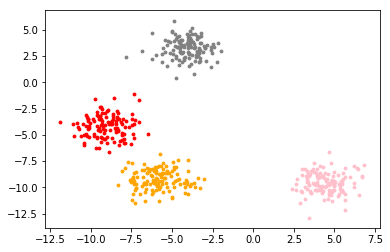

In [15]:
color = ['red', 'pink', 'orange', 'gray']
fig, axil = plt.subplots(1)   
for i in range(4):
    axil.scatter(X[y==i, 0], X[y==i, 1],  # 形如shape(n,)数组
                marker ='o',              # 散点的形状参数
                s=8,                      # 标量或形如shape(n,)数组
                c=color[i]                # 色彩或颜色序列
                )
plt.show()

## 使用K-Means进行建模
|参数名称|描述|
|:-|:-|
|algorithm|algorithm: 优化算法的选择，有auto、full和elkan三种选择。full就是一般意义上的K-Means算法，elkan是使用的elkan K-Means算法。auto则会根据数据值是否是稀疏的(稀疏一般指是有大量缺失值)，来决定如何选择full和elkan。如果数据是稠密的，就选择elkan K-means，否则就使用普通的Kmeans算法。|
|copy_x|主要起作用于提前计算距离的情况，如果是True,则表示在源数据的副本上提前计算距离时，不会修改源数据。|
|init|一般有三个默认值可以选择‘k-means++’、‘random’、或者传递一个ndarray向量。‘k-means++’ 用一种特殊的方法选定初始质心从而能加速迭代过程的收敛；‘random’ 随机从训练数据中选取初始质心；如果传递的是一个ndarray，则应该形如 (n_clusters, n_features) 并给出初始质心|
|max_iter|最大迭代数。|
|n_clusters|生成的聚类数|
|n_init|用不同的聚类中心初始化值运行算法的次数，最终解是在inertia意义下选出的最优结果。|
|n_jobs|指定计算所用的进程数。内部原理是同时进行n_init指定次数的计算。-1，则用所有的CPU进行运算。若值为1，则不进行并行运算。若值小于-1，为-2，则用到的CPU数为总CPU数减1。|
|precompute_distances|是否需要提前计算距离。如果选择auto，当样本数*质心数>12兆的时候，就不会提前进行计算，如果小于则会与提前计算。提前计算距离会让聚类速度很快，但是也会消耗很多内存。|
|random_state|用于初始化质心的生成器（generator）。如果值为一个整数，则确定一个seed。|
|tol|float型，容忍的最小误差，当误差小于tol就会退出迭代，与inertia结合来确定收敛条件。|
|verbose|是否输出详细信息|

In [17]:
from sklearn.cluster import KMeans
n_clusters = 3
cluster = KMeans(n_clusters = n_clusters, random_state = 0).fit(X)

y_pred = cluster.predict(X)

## 查看质心与inertia
每个簇内到其质心的距离相加，叫inertia。各个簇的inertia相加的和越小，即簇内越相似。（但是k越大inertia越小，追求k越大对应用无益处）

In [18]:
centroid = cluster.cluster_centers_  # 质心

inertia = cluster.inertia_           # inertia

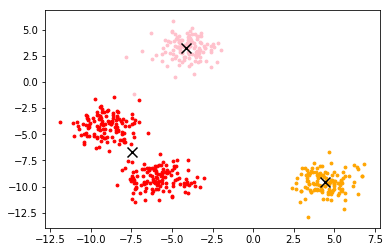

In [20]:
color = ['red', 'pink', 'orange', 'gray']
fig, axil = plt.subplots(1)
for i in range(n_clusters):
    axil.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
                marker = 'o',
                s = 8,
                c = color[i])
axil.scatter(centroid[:,0], centroid[:,1], marker = 'x', s = 100, c = 'black')

plt.show()